# Practica 2. Transformaciones básicas de la imagen y manipulación del Histograma.

El objetivo de esta práctica es entender y aplicar los conceptos de modificación del histograma, su manipulación y las transformaciones básicas de una imagen y entre imágenes.

## Información Importante:

Recuerde que para poder utilizar el repositorio de imágenes dado, debe descargarlo junto a este Notebook.

<br>La carpeta en la cual se encuentran las imágenes se llama "res", si desea cargar una imagen que está contenida en la carpeta, utilice el siguiente comando "res/nombredeimagen.(jpg,tiff,gif,png)" tal como se presenta en el ejemplo a continuación:</br>

In [2]:
#Importar librerías

%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

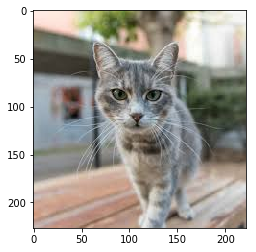

In [6]:
#Imagen importada de la carpeta res, que se encuentra en la MISMA carpeta que el notebook
img = cv2.imread('res/gato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Ahora, obtengamos el histograma de ésta imagen en el espacio de color RGB y, adicionalmente, los histogramas de cada uno de sus tres canales. Nótese que este procedimiento es análogo para cualquier espacio de color cualesquiera sean sus canales.

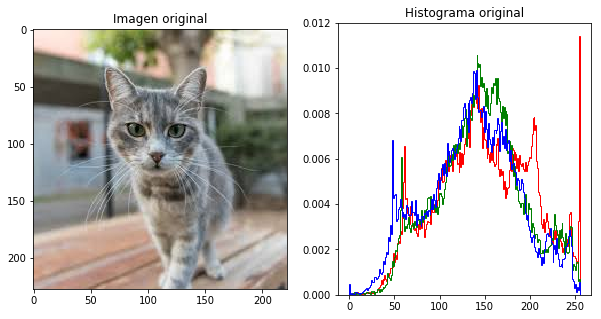

In [43]:
#Se realiza el arreglo de 1x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(1,2, figsize=(10,5))
colors = ('r','g','b')

#Se dan títulos y se muestra el histograma
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")
arreglo_plots[1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])



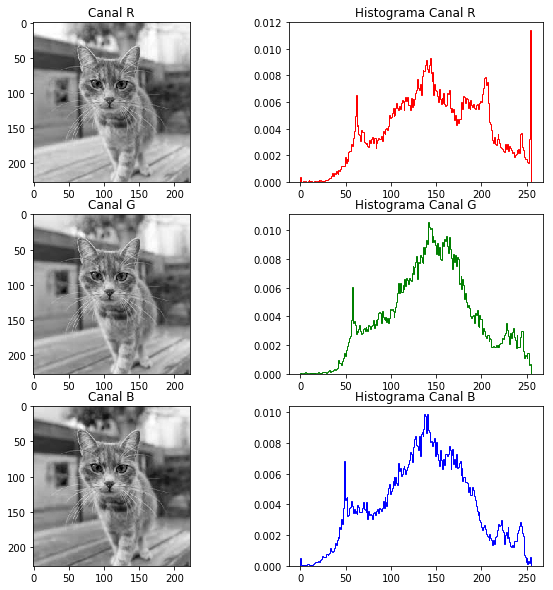

In [48]:
#Descomposición en varios canales del espacio de color RGB y sus respectivos histogramas
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]

fig, arreglo_plots = plt.subplots(3,2, figsize=(10, 10))
colors = ('r','g','b')
#Canal LAB
arreglo_plots[0,0].set_title('Canal R')
arreglo_plots[0,0].imshow(img_R, cmap="gray")
arreglo_plots[0,1].set_title('Histograma Canal R')
img_array_i = img[:,:,0].ravel()
arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[0])

arreglo_plots[1,0].set_title('Canal G')
arreglo_plots[1,0].imshow(img_G, cmap="gray")
arreglo_plots[1,1].set_title('Histograma Canal G')
img_array_i = img[:,:,1].ravel()
arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[1])
    
arreglo_plots[2,0].set_title('Canal B')
arreglo_plots[2,0].imshow(img_B, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal B')
img_array_i = img[:,:,2].ravel()
arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[2]);


Ya podemos extraer la información que necesitamos de este espacio de color sobre la imagen!
<br> Sin embargo, conocer y extraer información a partir del histograma de la imagen de entrada no lo es todo, usualmente encontraremos imágenes con ciertos desperfectos, información "escondida" en la pobre luminosidad de los pixeles, esta puede estar comprimida en una región del histograma, entre otros. </br>
<br>Las siguientes actividades, permiten al estudiante preprocesar imágenes a partir de un conjunto dado.</br>
### Recuerda, la otra parte del material, tanto códigos como información extra sobre las posibilidades que ofrece OpenCv para el preprocesamiento de imágenes, se encuentran en los notebooks correspondientes a la semana 4, a continuación se presentan las actividades a desarrollar.

## Actividad 1.

Recree los procesos de suma y resta sobre una imagen.
<br>Lea la imagen "gatos.jpg" que se encuentra en la carpeta "res" en el espacio de color RGB, muestre la imagen original con su respectivo histograma y, utilizando las operaciones de suma (cv2.add) <b>o</b> resta (cv2.subtract) obtenga las siguientes imágenes y sus histogramas asociados: </br>

1. <img src = res/gatosazul.png>
2. <img src = res/gatosmorados.png>
3. <img src = res/gatosm.png>


## Actividad 2.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", muestre la imagen original con su respectivo histograma.

<br>A continuación, se presenta una operación resta, donde I(x,y) es la imagen de entrada:</br>

# <center> $ G(x,y) = | b - I(x,y) | $ </center>

Se quiere obtener el negativo de la imagen de entrada "gatonegro.jpg" a partir de ésta expresión, ¿Qué valor de b debería utilizar?

<br> Implemente, haciendo uso de la operación resta (cv2.subtract), el negativo de una imagen con el valor de b seleccionado. </br>

## Actividad 3.

Lea la imagen "cat.jpg" que se encuentra en la carpeta "res", muestre la imagen original con su respectivo histograma.

<br> Utilice, el comando cv2.multiply para multiplicar y dividir los píxeles de la imagen, muestre, por separado, el resultado de ambas operaciones realizadas. </br>

## En este ejercicio, usted debe seleccionar los valores bajo los cuales realizará las operaciones de estiramiento y contracción del histograma,  recuerde que sin importar el resultado obtenido, debe explicarlo.

## Actividad 4.

Lea las imágenes "gatonegro.jpg" y "gatoblanco.jpg" que se encuentran en la carpeta "res". Muestre la imagen "gatoblanco.jpg" con su respectivo histograma.

## Parte a)

<br> A continuación, se presenta una transformación sobre ambas imágenes </br>

# <center> $ G(x,y) = (1-k)*I1(x,y) + k*I2(x,y) $ </center>

# <center> $ 0 < k < 1 $ </center>

Realice un código que muestre esta transformación, posteriormente responda:

<br> ¿Qué ocurre si k = 1, k = 0, k = 0.5? </br>

## Parte b)

<br> Implemente la transformación: </br>
# <center> $ G(x,y) = a*I1(x,y) + b $ </center>
 
Donde I1(x,y) es la imagen "gatonegro.jpg", a & b son constantes.
<br> ¿Qué ocurre si a=0 & b es cualquier valor? ¿Qué ocurre si a = 1 & b > 255? </br>
<br> Experimente con algún valor arbitrario de a & b y explique su resultado.

## Parte c)

¿Puede afirmar que, la implementación de la línea recta sobre la imagen, permite aplicar operaciones de suma, resta, multiplicación y división sobre la imagen?

<br> Verifique su respuesta, leyendo la imagen "gatos.jpg" que se encuentra en la carpeta "res" e intente obtener la primera imagen de la actividad 1) </br>